In [2]:
import numpy as np
from scipy.signal import stft
import h5py, json
import matplotlib.pyplot as plt

Some parameters

In [3]:
Rmin = 0.2
Rmax = 1.0

Read the h5 file

In [14]:
hf = h5py.File('raw data xm122\XM122 range(0.2m-1m),Max buffered frame 128,Update rate 30Hz [toright twice3].h5', 'r')

The data contains complex128 dtype with dimensions (frame_count, depth_slices_count)

In [17]:
data = np.squeeze(np.array(hf['/data']))
Nframe, Ndepth = data.shape
data.shape

(128, 1653)

Extract some properties of the h5 file

In [6]:
property_keys = ['timestamp', 'rss_version', 'lib_version']
properties = {key: str(np.array(hf[f'/{key}']))[2:-1] for key in property_keys}

Data info is a list containing extra information about the data collected in each frame

In [9]:
data_info = json.loads(str(np.array(hf['/data_info'])))#json.loads(str(np.array(hf['/data_info']))[2:-1])
data_info

[[{'missed_data': True,
   'data_saturated': False,
   'proximity_power': 0,
   'data_quality_warning': False,
   'sensor_comm_error': False}],
 [{'missed_data': True,
   'data_saturated': False,
   'proximity_power': 0,
   'data_quality_warning': False,
   'sensor_comm_error': False}],
 [{'missed_data': True,
   'data_saturated': False,
   'proximity_power': 0,
   'data_quality_warning': False,
   'sensor_comm_error': False}],
 [{'missed_data': True,
   'data_saturated': False,
   'proximity_power': 0,
   'data_quality_warning': False,
   'sensor_comm_error': False}],
 [{'missed_data': True,
   'data_saturated': False,
   'proximity_power': 0,
   'data_quality_warning': False,
   'sensor_comm_error': False}],
 [{'missed_data': True,
   'data_saturated': False,
   'proximity_power': 0,
   'data_quality_warning': False,
   'sensor_comm_error': False}],
 [{'missed_data': True,
   'data_saturated': False,
   'proximity_power': 0,
   'data_quality_warning': False,
   'sensor_comm_error': F

In [10]:
hf.close()

In [11]:
print(data_info[0], properties)
processed_data = abs(np.fft.fft(data, 128))

[{'missed_data': True, 'data_saturated': False, 'proximity_power': 0, 'data_quality_warning': False, 'sensor_comm_error': False}] {'timestamp': '21-09-02T16:08:2', 'rss_version': '8.', 'lib_version': '12.'}


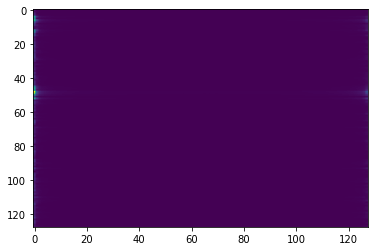

In [12]:
plt.imshow(processed_data/np.max(processed_data), aspect='auto')
plt.show()